In [1]:
from training_4Stim import *
from scipy import stats
import pandas as pd

Load data

In [2]:
# BIPOLAR CELLS
loc = np.load('Model Input Normalised - BCs/bc_cluster_locations.npy')
ventral_bcs = np.where(loc == 'ventral')[0]
print('Nb of BCs')
print(len(ventral_bcs))
types_uv_center = np.load('Model Input Normalised - BCs/types_uv_center.npy')[ventral_bcs]
types_uv_surround = np.load('Model Input Normalised - BCs/types_uv_surround.npy')[ventral_bcs]
types_green_center = np.load('Model Input Normalised - BCs/types_green_center.npy')[ventral_bcs]
types_green_surround = np.load('Model Input Normalised - BCs/types_green_surround.npy')[ventral_bcs]

types = np.column_stack((types_uv_center, types_uv_surround, types_uv_surround,
                         types_green_center, types_green_surround, types_green_surround))

flicker_stim_uv = np.load('Model Input Normalised - BCs/uv_flicker_64Hz.npy')
flicker_stim_green = np.load('Model Input Normalised - BCs/green_flicker_64Hz.npy')
bcs_response_uv = np.load('Model Input Normalised - BCs/uv_avrg_resp_64Hz_norm.npy')[ventral_bcs].astype(np.float32)
bcs_response_green = np.load('Model Input Normalised - BCs/green_avrg_resp_64Hz_norm.npy')[ventral_bcs].astype(np.float32)

# Order: uv center, uv ring, uv surround, green center, green ring, green surround
bcs_uv_flicker = np.column_stack((flicker_stim_uv[:,0], 
                                  flicker_stim_uv[:,1],
                                  flicker_stim_uv[:,1],
                                  np.zeros(len(flicker_stim_uv[:,0])),
                                  np.zeros(len(flicker_stim_uv[:,0])),
                                  np.zeros(len(flicker_stim_uv[:,0])))).astype(np.float32)

bcs_green_flicker = np.column_stack((np.zeros(len(flicker_stim_green[:,0])),
                                     np.zeros(len(flicker_stim_green[:,0])),
                                     np.zeros(len(flicker_stim_green[:,0])),
                                     flicker_stim_green[:,0],
                                     flicker_stim_green[:,1],
                                     flicker_stim_green[:,1])).astype(np.float32)

chirp_stim = np.load('Model Input Normalised - BCs/chirp_stim_64Hz.npy')
bcs_response_chirp = np.load('Model Input Normalised - BCs/global_chirp_avrg_resp_64Hz_norm.npy')[ventral_bcs].astype(np.float32)
bcs_response_local_chirp = np.load('Model Input Normalised - BCs/local_chirp_avrg_resp_64Hz_norm.npy')[ventral_bcs].astype(np.float32)

# Order: uv center, uv ring, uv surround, green center, green ring, green surround
chirp_stim_full = np.column_stack((chirp_stim,
                                   chirp_stim,
                                   chirp_stim,
                                   chirp_stim, 
                                   chirp_stim, 
                                   chirp_stim)).astype(np.float32)

local_chirp_stim_full = np.column_stack((chirp_stim, 
                                         np.zeros(len(chirp_stim)),
                                         np.zeros(len(chirp_stim)),
                                         chirp_stim, 
                                         np.zeros(len(chirp_stim)),
                                         np.zeros(len(chirp_stim)))).astype(np.float32)

# AMACRINE CELLS
acs_response_chirp = np.load('Model Input Normalised - ACs/global_chirp_avrg_resp_64Hz_norm.npy').astype(np.float32)
acs_response_local_chirp = np.load('Model Input Normalised - ACs/local_chirp_avrg_resp_64Hz_norm.npy').astype(np.float32)

acs_flicker_stim_uv_1 = np.load('Model Input Normalised - ACs/uv_1_flicker_64Hz.npy')
acs_flicker_stim_uv_2 = np.load('Model Input Normalised - ACs/uv_2_flicker_64Hz.npy')
acs_flicker_stim_green_1 = np.load('Model Input Normalised - ACs/green_1_flicker_64Hz.npy')
acs_flicker_stim_green_2 = np.load('Model Input Normalised - ACs/green_2_flicker_64Hz.npy')

acs_response_uv_1 = np.load('Model Input Normalised - ACs/uv_1_avrg_resp_64Hz_norm.npy').astype(np.float32)
acs_response_uv_2 = np.load('Model Input Normalised - ACs/uv_2_avrg_resp_64Hz_norm.npy').astype(np.float32)
acs_response_green_1 = np.load('Model Input Normalised - ACs/green_1_avrg_resp_64Hz_norm.npy').astype(np.float32)
acs_response_green_2 = np.load('Model Input Normalised - ACs/green_2_avrg_resp_64Hz_norm.npy').astype(np.float32)


# Order: uv center, uv ring, uv surround, green center, green ring, green surround
acs_uv_flicker_1 = np.column_stack((acs_flicker_stim_uv_1[:,0], 
                                    acs_flicker_stim_uv_1[:,1],
                                    acs_flicker_stim_uv_1[:,2],
                                    np.zeros(len(acs_flicker_stim_uv_1[:,0])),
                                    np.zeros(len(acs_flicker_stim_uv_1[:,0])),
                                    np.zeros(len(acs_flicker_stim_uv_1[:,0])))).astype(np.float32)

acs_uv_flicker_2 = np.column_stack((acs_flicker_stim_uv_2[:,0], 
                                    acs_flicker_stim_uv_2[:,1],
                                    acs_flicker_stim_uv_2[:,2],
                                    np.zeros(len(acs_flicker_stim_uv_2[:,0])),
                                    np.zeros(len(acs_flicker_stim_uv_2[:,0])),
                                    np.zeros(len(acs_flicker_stim_uv_2[:,0])))).astype(np.float32)

acs_green_flicker_1 = np.column_stack((np.zeros(len(acs_flicker_stim_green_1[:,0])),
                                       np.zeros(len(acs_flicker_stim_green_1[:,0])),
                                       np.zeros(len(acs_flicker_stim_green_1[:,0])),
                                       acs_flicker_stim_green_1[:,0], 
                                       acs_flicker_stim_green_1[:,1],
                                       acs_flicker_stim_green_1[:,2])).astype(np.float32)

acs_green_flicker_2 = np.column_stack((np.zeros(len(acs_flicker_stim_green_2[:,0])),
                                       np.zeros(len(acs_flicker_stim_green_2[:,0])),
                                       np.zeros(len(acs_flicker_stim_green_2[:,0])),
                                       acs_flicker_stim_green_2[:,0], 
                                       acs_flicker_stim_green_2[:,1],
                                       acs_flicker_stim_green_2[:,2])).astype(np.float32)

penalty_matrix = np.exp((np.load('ipl_penalty.npy')[:,ventral_bcs])-1)
penalty_matrix_acs = np.exp(np.load('ipl_penalty_ac_ac.npy')-1)
penalty_matrix[penalty_matrix>1] = 50
penalty_matrix_acs[penalty_matrix_acs>1] = 50

Nb of BCs
13


Training

0
100
200


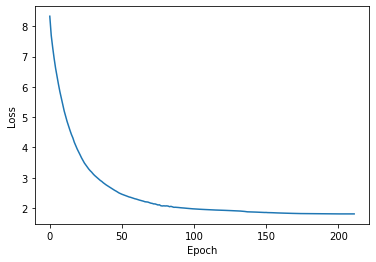

In [3]:
# Create model
model = FullBCModel(cell_types = types,
                    num_pr = 6,
                    steady_state_steps=10,
                    ip_steady=np.ones(13),
                    rrp_steady=np.ones(13),
                    num_acl=25,
                    seed=355)
    
# Train
total_loss = train(model = model,
                   # Shared BCs and ACs
                   stimulus_local = local_chirp_stim_full,
                   responses_local_bcs = bcs_response_local_chirp,
                   responses_local_acs = acs_response_local_chirp,
                   stimulus_global = chirp_stim_full,
                   responses_global_bcs = bcs_response_chirp,
                   responses_global_acs = acs_response_chirp,
                   # BCs
                   stimulus_uv_bcs = bcs_uv_flicker,
                   responses_uv_bcs = bcs_response_uv,
                   stimulus_green_bcs = bcs_green_flicker,
                   responses_green_bcs = bcs_response_green,
                   # ACs
                   stimulus_uv_acs = [acs_uv_flicker_1, acs_uv_flicker_2],
                   responses_uv_acs = [acs_response_uv_1, acs_response_uv_2],
                   stimulus_green_acs = [acs_green_flicker_1, acs_green_flicker_2],
                   responses_green_acs = [acs_response_green_1, acs_response_green_2],
                   penalty_matrix = penalty_matrix,
                   penalty_matrix_acs = penalty_matrix_acs,
                   log_dir='results/ventral/19/',
                   lr = 0.08,
                   time_reg_weight=0.02049110734470197,
                   sparsity_reg_weight=3.8927961677499236e-03,
                   scaling_mean_weight=2.5717471827325356, 
                   scaling_std_weight=0.6809779474260329,
                   scaling_sc_weight = 0.5,
                   max_steps=400,
                   stop_after = 8)

# Plot results
plt.plot(total_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()